<a href="https://colab.research.google.com/github/YouCanKeepSilence/ml_labs/blob/master/course_project_keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт данных

In [0]:
! pip install -U pandas-profiling
import keras
import pandas as pd
import pandas_profiling

     |████████████████████████████████| 133kB 2.9MB/s 
     |████████████████████████████████| 614kB 41.1MB/s 
     |████████████████████████████████| 235kB 43.6MB/s 
     |████████████████████████████████| 307kB 46.8MB/s 
     |████████████████████████████████| 215kB 46.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 737kB 46.2MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=21204803f3349e4bbf3b98051496cd60ff7eb959fa4c1f54d8d81bb53cc4100d
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=386ee42e6c8ac3e7ba4338c6f6162d19094b08d02c1d7bb9bb2cd0fcb67ed612
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whee

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Загружаем данные из .csv

In [0]:
names_array = ['gender', 'age', 'first_label', 'second_label', 'third_label', *['c_{}'.format(i + 1) for i in range(60000)]]
url = '/content/drive/My Drive/ML/half.csv'
data = pd.read_csv(url, names=names_array)

# Обработка данных

Удаляем ненужные стобцы (по причине малого количества данных в них)

In [0]:
data = data.drop(['second_label', 'third_label'], axis=1)

In [0]:
data

,gender,age,first_label,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,c_29,c_30,c_31,c_32,c_33,c_34,c_35,c_36,c_37,...,c_59961,c_59962,c_59963,c_59964,c_59965,c_59966,c_59967,c_59968,c_59969,c_59970,c_59971,c_59972,c_59973,c_59974,c_59975,c_59976,c_59977,c_59978,c_59979,c_59980,c_59981,c_59982,c_59983,c_59984,c_59985,c_59986,c_59987,c_59988,c_59989,c_59990,c_59991,c_59992,c_59993,c_59994,c_59995,c_59996,c_59997,c_59998,c_59999,c_60000
0,Female,85,3,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,-0.068795,-0.070163,...,-0.026842,-0.028914,-0.028548,-0.029272,-0.031896,-0.036031,-0.039794,-0.033593,-0.028113,-0.031301,-0.041995,-0.045999,-0.043968,-0.039291,-0.030942,-0.031698,-0.030754,-0.033479,-0.033446,-0.036413,-0.038551,-0.035920,-0.036477,-0.036518,-0.041184,-0.039042,-0.033992,-0.033940,-0.031528,-0.026267,-0.028246,-0.028318,-0.025569,-0.021279,-0.018593,-0.032023,-0.046202,-0.042003,-0.034466,-0.039000
1,Male,79,9,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,-0.021534,-0.024676,...,-0.934049,-0.949376,-0.962051,-0.963686,-0.961742,-0.952030,-0.939060,-0.934415,-0.936366,-0.939326,-0.932011,-0.926725,-0.928331,-0.929013,-0.921389,-0.906309,-0.900787,-0.901273,-0.895911,-0.893740,-0.891627,-0.885869,-0.881577,-0.873489,-0.866113,-0.865862,-0.859139,-0.852907,-0.843380,-0.833925,-0.833698,-0.836701,-0.827418,-0.827810,-0.816231,-0.819793,-0.797862,-0.819597,-0.771195,-0.845490
2,Male,66,3,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,0.008492,0.008492,...,-0.051053,-0.052053,-0.051053,-0.049053,-0.047053,-0.044053,-0.040053,-0.037053,-0.036053,-0.034053,-0.034053,-0.034053,-0.033053,-0.031053,-0.028053,-0.025053,-0.022053,-0.019053,-0.017053,-0.017053,-0.016053,-0.016053,-0.014053,-0.013053,-0.010053,-0.007053,-0.003053,0.001947,0.004947,0.007947,0.009947,0.011947,0.012947,0.015947,0.018947,0.023947,0.027947,0.030947,0.034947,0.037947
3,Male,93,2,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,0.059849,0.036704,...,-0.117502,-0.208445,-0.254530,-0.270954,-0.254278,-0.223832,-0.205055,-0.179093,-0.157585,-0.127692,-0.089728,-0.074150,-0.056856,-0.038932,-0.024184,-0.016817,-0.014031,-0.011765,-0.022771,-0.023586,-0.013769,-0.004949,-0.003625,-0.013567,-0.019471,-0.015372,-0.021787,-0.028885,-0.028997,-0.021737,-0.013160,-0.006182,-0.003825,-0.002177,-0.001466,-0.006676,-0.011236,-0.016540,-0.016289,-0.022542
4,Male,65,2,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,0.004789,-0.007276,...,1.016910,0.710028,0.4

## Аугментируем данные

Увеличим кол-во образцов, одновременно уменьшив число признаков. Оставим 1000 измерений для каждой записи. Каждый последующий отрезок будем формировать в отдельную запись

In [0]:
# batch_size = 1000
measurment_names = data.columns[3:]
new_data = pd.DataFrame()

# i = batch_size * 2
# current_measurment_names = {f'c_{j + 1}': f'c_{j % batch_size + 1}' for j in range(i, i + batch_size)}
# data[['age', 'gender', 'first_label', *[f'c_{j + 1}' for j in range(i, i + batch_size)]]].rename(columns=current_measurment_names)

# for i in range(0, len(measurment_names), batch_size):
#  current_measurment_names = {f'c_{j + 1}': f'c_{j % batch_size + 1}' for j in range(i, i + batch_size)}
#  mapped_piece = data[['age', 'gender', 'first_label', *[f'c_{j + 1}' for j in range(i, i + batch_size)]]].rename(columns=current_measurment_names)
#  new_data = pd.concat([new_data, mapped_piece])

# Пользуемся тем, что имеем 5к измерений для каждого из 12 датчиков. Соответственно нарежем по 100 с каждого из 12 датчиков
new_batch = 100
measurments_for_sensors = 5000
sensors_count = 12
for i in range(0, measurments_for_sensors, new_batch):
    current_measurment_names = {f'c_{k + j * measurments_for_sensors + 1}': f'c_{(new_batch * j + k % new_batch) % (new_batch * sensors_count)  + 1}' for j in range(sensors_count) for k in range(i, i + new_batch)}
    mapped_piece = data[['age', 'gender', 'first_label', *[f'c_{k + j * measurments_for_sensors + 1}'  for j in range(sensors_count) for k in range(i, i + new_batch)]]].rename(columns=current_measurment_names)
    new_data = pd.concat([new_data, mapped_piece])


new_data

,age,gender,first_label,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,c_29,c_30,c_31,c_32,c_33,c_34,c_35,c_36,c_37,...,c_1161,c_1162,c_1163,c_1164,c_1165,c_1166,c_1167,c_1168,c_1169,c_1170,c_1171,c_1172,c_1173,c_1174,c_1175,c_1176,c_1177,c_1178,c_1179,c_1180,c_1181,c_1182,c_1183,c_1184,c_1185,c_1186,c_1187,c_1188,c_1189,c_1190,c_1191,c_1192,c_1193,c_1194,c_1195,c_1196,c_1197,c_1198,c_1199,c_1200
0,85,Female,3,0.003242,0.012132,0.022637,0.010953,-0.024891,-0.032752,-0.031432,-0.042890,-0.048659,-0.037955,-0.026816,-0.017216,-0.014815,-0.024370,-0.027953,-0.037105,-0.046662,-0.052641,-0.054785,-0.054178,-0.034856,-0.023726,-0.036748,-0.031842,-0.021913,-0.038332,-0.045422,-0.044497,-0.042550,-0.038772,-0.043089,-0.055117,-0.062105,-0.062300,-0.062635,-0.068795,-0.070163,...,-0.084297,-0.084033,-0.084342,-0.083629,-0.079411,-0.073300,-0.068458,-0.071152,-0.071827,-0.078544,-0.081958,-0.074306,-0.071318,-0.071556,-0.073622,-0.079618,-0.081303,-0.076736,-0.071588,-0.075972,-0.087200,-0.093993,-0.092644,-0.089230,-0.084512,-0.084235,-0.083674,-0.079665,-0.078926,-0.079390,-0.078383,-0.076662,-0.074386,-0.069177,-0.069591,-0.073513,-0.074327,-0.073783,-0.076592,-0.079330
1,79,Male,9,0.012054,0.017017,0.015951,0.020941,0.020960,0.021158,0.021051,0.021062,0.021122,0.021278,0.026533,0.026235,0.016037,0.013366,0.013222,0.008356,0.005556,0.007938,0.008593,0.008398,0.008547,0.008369,0.008677,0.006235,0.000651,-0.001857,-0.001712,-0.007047,-0.009004,-0.012014,-0.019256,-0.019027,-0.019518,-0.018919,-0.020128,-0.021534,-0.024676,...,0.385881,0.479394,0.585771,0.716659,0.867699,1.029641,1.180318,1.314271,1.428005,1.505758,1.505906,1.410019,1.253614,1.079792,0.930911,0.802771,0.688484,0.580103,0.485136,0.411515,0.357595,0.323632,0.305162,0.290775,0.273156,0.250531,0.223057,0.197461,0.179283,0.166877,0.159151,0.156907,0.157417,0.162258,0.164580,0.157787,0.151301,0.144352,0.139498,0.134636
2,66,Male,3,-0.009508,-0.008508,-0.009508,-0.008508,-0.007508,-0.006508,-0.006508,-0.006508,-0.005508,-0.006508,-0.005508,-0.004508,-0.003508,-0.004508,-0.004508,-0.004508,-0.005508,-0.004508,-0.003508,-0.004508,-0.003508,-0.002508,-0.000508,-0.001508,-0.000508,-0.000508,-0.001508,-0.001508,-0.001508,-0.000508,0.000492,0.002492,0.005492,0.006492,0.007492,0.008492,0.008492,...,0.103947,0.109947,0.114947,0.117947,0.120947,0.123947,0.125947,0.128947,0.131947,0.133947,0.135947,0.135947,0.134947,0.134947,0.133947,0.131947,0.130947,0.129947,0.128947,0.127947,0.126947,0.124947,0.122947,0.120947,0.116947,0.114947,0.112947,0.111947,0.110947,0.109947,0.107947,0.105947,0.103947,0.099947,0.095947,0.092947,0.088947,0.084947,0.080947,0.076947
3,93,Male,2,-0.002271,0.004177,-0.002077,-0.005875,-0.004685,-0.008117,-0.019722,-0.036185,-0.037616,-0.025323,-0.023199,-0.035744,-0.043484,-0.030469,-0.022611,-0.010540,0.004805,0.020337,0.029668,0.017382,0.004737,0.002755,0.014075,0.015677,0.002024,-0.002544,0.000068,0.000271,0.011654,0.022805,0.028631,0.029834,0.030584,0.035327,0.051485,0.059849,0.036704,...,-0.024158,-0.016683,-0.008289,-0.006698,-0.003951,-0.001068,-0.001585,-0.001308,-0.001464,-0.001386,-0.001394,-0.001452,-0.001313,-0.001599,0.000516,0.001250,0.000769,-0.004143,-0.006219,-0.003406,-0.006068,-0.006359,-0.007042,-0.009181,-0.008829,-0.009153,-0.007098,-0.006504,-0.013484,-0.018747,-0.019171,-0.017244,-0.016292,-0.016466,-0.010678,-0.006352,-0.011516,-0.010930,-0.015703,-0.014241
4,65,Male,2,-0.030600,-0.027425,-0.013923,-0.023743,-0.024572,-0.036078,-0.034740,-0.013670,-0.009571,-0.022441,-0.033034,-0.032663,-0.018181,-0.017317,-0.030576,-0.032829,-0.010305,0.005287,0.006696,-0.002352,-0.005559,-0.005361,-0.008254,0.002175,0.007531,0.002662,0.000376,-0.007697,-0.016977,-0.009894,-0.000388,-0.012127,-0.007840,-0.002470,-0.005233,0.004789,-0.007276,...,-0.014208,-0.014241,-0.014173,-0.014288,-0.014097,-0.014465,-0.011862,-0.006941,-0.006696,-0.006241,-0.001947,-0.003368,-0.004407,-

Таким образом получаем из размерности 1250, 60003 -> 62500, 1203 увеличив количество записей в датасете в 50 раз.



## Обработаем пропущенные значения

In [0]:
print(new_data['age'].unique())
print(new_data['gender'].unique())
print(new_data['first_label'].unique())
print(new_data.isnull().sum())

[85 79 66 93 65 55 82 87 51 61 90 77 70 60 62 59 84 71 45 48 75 49 72 78
 86 46 94 33 74 64 67 63 88 32 92 68 76 54 89 31 80 30 57 83 34 27 73 69
 52 44 43 47 39 56 81 53 50 16 29 37 58 24 22 40 41 11 26 28 96 35 91 25
 36 23 19 17 42 18 15  8 20 38 14 21]
['Female' 'Male']
[3 9 2 5 1 7 6 4 8]
age            0
gender         0
first_label    0
c_1            0
c_2            0
              ..
c_1196         0
c_1197         0
c_1198         0
c_1199         0
c_1200         0
Length: 1203, dtype: int64


Пропущенных значений нет.

## Обработаем категориальные признаки

In [0]:
categorial_columns = ['gender', 'first_label']
numerical_columns = ['age', *[f'c_{i + 1}' for i in range(new_batch * sensors_count)]]
print(categorial_columns)
print(numerical_columns)

['gender', 'first_label']
['age', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26', 'c_27', 'c_28', 'c_29', 'c_30', 'c_31', 'c_32', 'c_33', 'c_34', 'c_35', 'c_36', 'c_37', 'c_38', 'c_39', 'c_40', 'c_41', 'c_42', 'c_43', 'c_44', 'c_45', 'c_46', 'c_47', 'c_48', 'c_49', 'c_50', 'c_51', 'c_52', 'c_53', 'c_54', 'c_55', 'c_56', 'c_57', 'c_58', 'c_59', 'c_60', 'c_61', 'c_62', 'c_63', 'c_64', 'c_65', 'c_66', 'c_67', 'c_68', 'c_69', 'c_70', 'c_71', 'c_72', 'c_73', 'c_74', 'c_75', 'c_76', 'c_77', 'c_78', 'c_79', 'c_80', 'c_81', 'c_82', 'c_83', 'c_84', 'c_85', 'c_86', 'c_87', 'c_88', 'c_89', 'c_90', 'c_91', 'c_92', 'c_93', 'c_94', 'c_95', 'c_96', 'c_97', 'c_98', 'c_99', 'c_100', 'c_101', 'c_102', 'c_103', 'c_104', 'c_105', 'c_106', 'c_107', 'c_108', 'c_109', 'c_110', 'c_111', 'c_112', 'c_113', 'c_114', 'c_115', 'c_116', 'c_117', 'c_118', 'c_119', 'c_

Проведем бинаризацию пола, label не трогаем, им займемся дальше

In [0]:
new_data.at[data['gender'] == 'Male', 'gender'] = 0
new_data.at[data['gender'] == 'Female', 'gender'] = 1
new_data['gender'].describe()

count    62500.000000
mean         0.392800
std          0.488377
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [0]:
categorial_columns.remove('gender')
numerical_columns.append('gender')

## Произведем нормировку данных

In [0]:
numerical_data = new_data[numerical_columns]
numerical_data.describe()

,age,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,c_29,c_30,c_31,c_32,c_33,c_34,c_35,c_36,c_37,c_38,c_39,...,c_1162,c_1163,c_1164,c_1165,c_1166,c_1167,c_1168,c_1169,c_1170,c_1171,c_1172,c_1173,c_1174,c_1175,c_1176,c_1177,c_1178,c_1179,c_1180,c_1181,c_1182,c_1183,c_1184,c_1185,c_1186,c_1187,c_1188,c_1189,c_1190,c_1191,c_1192,c_1193,c_1194,c_1195,c_1196,c_1197,c_1198,c_1199,c_1200,gender
count,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,6.250000e+04,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,...,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000
mean,65.856000,-0.000131,-0.000109,-0.000074,0.000083,0.000291,0.000343,0.000312,0.000228,0.000150,0.000104,-6.020278e-07,-0.000051,-0.000039,0.000038,-0.000025,-0.000056,0.000038,0.000114,0.000101,0.000048,0.000116,0.000242,0.000345,0.000473,0.000654,0.000607,0.000432,0.000468,0.000536,0.000609,0.000700,0.000804,0.000900,0.001013,0.000992,0.000784,0.000532,0.000911,0.000318,...,0.000688,0.000529,0.000285,0.000075,-0.000277,-0.000770,-0.001049,-0.001132,-0.001204,-0.001252,-0.001273,-0.001421,-0.001519,-0.001571,-0.001816,-0.002210,-0.001417,-0.002577,-0.002679,-0.002650,-0.002605,-0.002645,-0.002021,-0.002299,-0.002122,-0.002058,-0.000816,-0.001546,-0.001234,-0.000883,-0.000630,-0.000672,-0.000795,-0.000878,-0.000564,-0.001315,-0.001369,-0.001202,-0.001003,0.392800
std,16.253329,0.135949,0.136556,0.136609,0.137140,0.137461,0.137965,0.138485,0.138491,0.138037,0.137611,1.375860e-01,0.137756,0.137845,0.137990,0.138356,0.138916,0.139806,0.140510,0.140772,0.140769,0.140671,0.140381,0.139826,0.139309,0.138941,0.138890,0.139415,0.140099,0.140657,0.140920,0.140908,0.140862,0.140755,0.140533,0.140388,0.140384,0.140464,0.191966,0.140067,...,0.300799,0.300239,0.299581,0.299016,0.298541,0.298637,0.298910,0.298992,0.299317,0.299581,0.299265,0.299202,0.299413,0.299335,0.298967,0.298800,0.350968,0.296841,0.296484,0.296311,0.295452,0.295265,0.323332,0.295820,0.296508,0.297568,0.351233,0.298945,0.299563,0.299999,0.299121,0.298025,0.297158,0.296354,0.323355,0.295441,0.294804,0.293531,0.293770,0.488377
min,8.000000,-2.278990,-2.265990,-2.247990,-2.232990,-2.226990,-2.233990,-2.247990,-2.257990,-2.248990,-2.210990,-2.165990e+00,-2.276214,-2.123990,-2.153990,-2.190990,-2.210990,-2.297394,-2.969033,-3.276172,-3.423257,-3.597246,-3.650212,-2.810134,-2.278990,-2.277990,-2.262990,-2.528414,-3.121612,-3.196962,-3.122497,-3.025086,-3.040374,-2.497349,-2.270990,-2.243990,-2.225990,-2.214990,-2.217990,-2.226990,...,-7.577025,-7.564025,-7.549025,-7.531025,-7.514025,-7.494025,-7.473025,-7.452025,-7.436025,-7.423025,-7.411025,-7.398025,-7.382025,-7.364025,-7.348025,-7.327025,-7.306025,-7.285025,-7.268025,-7.255025,-7.243025,-7.230025,-7.215025,-7.197025,-7.181025,-7.160025,-7.140025,-7.119025,-7.102025,-7.089025,-7.077025,-7.064025,-7.049025,-7.031025,-7.015025,-6.994025,-6.974025,-6.954025,-6.938025,0.000000
25%,58.000000,-0.043867,-0.044072,-0.044187,-0.044046,-0.043854,-0.043769,-0.044127,-0.044013,-0.044217,-0.044199,-4.419076e-02,-0.043914,-0.043928,-0.0441

In [0]:
mean = numerical_data.mean(axis = 0)
std = numerical_data.std(axis = 0)
numerical_data = (numerical_data - mean) / std
new_data[numerical_columns] = numerical_data

In [0]:
new_data.describe()

,age,gender,first_label,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,c_29,c_30,c_31,c_32,c_33,c_34,c_35,c_36,c_37,...,c_1161,c_1162,c_1163,c_1164,c_1165,c_1166,c_1167,c_1168,c_1169,c_1170,c_1171,c_1172,c_1173,c_1174,c_1175,c_1176,c_1177,c_1178,c_1179,c_1180,c_1181,c_1182,c_1183,c_1184,c_1185,c_1186,c_1187,c_1188,c_1189,c_1190,c_1191,c_1192,c_1193,c_1194,c_1195,c_1196,c_1197,c_1198,c_1199,c_1200
count,6.250000e+04,6.250000e+04,62500.000000,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,...,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04,6.250000e+04
mean,3.069385e-16,-9.663559e-17,4.007200,6.752821e-18,-3.835887e-17,6.162765e-18,-8.744561e-18,4.898304e-19,-1.650990e-17,-1.046230e-17,8.109069e-19,4.487477e-17,1.787326e-17,-3.076117e-17,-1.321609e-17,3.485212e-17,1.822453e-17,-6.266720e-17,4.606449e-17,-3.918377e-17,9.779022e-17,-1.280753e-18,5.614886e-17,9.196199e-17,6.578915e-17,4.394174e-17,-5.888445e-17,1.021734e-16,5.714540e-18,-1.419229e-16,-6.659207e-17,-2.268408e-17,1.608136e-16,-1.310623e-16,9.426682e-17,-7.528911e-17,1.282611e-16,-8.725953e-17,-1.659173e-17,2.230408e-17,...,1.097833e-17,4.223821e-17,9.101475e-17,4.199396e-17,-7.150325e-17,-3.178346e-17,3.377920e-17,-8.232526e-18,8.275514e-17,7.315482e-17,1.750111e-17,1.371081e-17,2.569500e-17,-2.747758e-17,-8.124879e-17,4.888623e-17,-2.522782e-17,1.885341e-16,-3.167688e-17,-7.934275e-17,2.387921e-16,1.924327e-17,-9.109158e-18,5.391598e-17,-7.299406e-17,7.494805e-17,-2.135891e-16,1.028724e-16,6.083667e-17,-8.270717e-18,5.564971e-17,4.220624e-17,2.525269e-17,2.259526e-18,3.822720e-18,-1.682565e-17,-1.227818e-17,1.246891e-17,2.262368e-17,5.161027e-17
std,1.000000e+00,1.000000e+00,2.205998,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.559640e+00,-8.042969e-01,1.000000,-1.676258e+01,-1.659309e+01,-1.645516e+01,-1.628315e+01,-1.620301e+01,-1.619497e+01,-1.623498e+01,-1.630586e+01,-1.629375e+01,-1.606768e+01,-1.574281e+01,-1.652320e+01,-1.540824e+01,-1.561007e+01,-1.583570e+01,-1.591562e+01,-1.643302e+01,-2.113129e+01,-2.327367e+01,-2.431852e+01,-2.557290e+01,-2.600390e

Нормализовали все поля кроме label т.к. он является выходным и его нет смысла нормализовывать.

# Подготовка модели

In [0]:
y = new_data['first_label'].values
X = new_data.drop(['first_label'], axis=1).values
y_mapped = keras.utils.to_categorical(y)

In [0]:
new_data['first_label'].unique()

array([3, 9, 2, 5, 1, 7, 6, 4, 8])

In [0]:
y_mapped[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state = 13)

In [0]:
input_count = X[0].shape[0]
num_classes = y_mapped[0].shape[0]
print(f'Output shape: {y_mapped[0].shape}')
print(f'Input shape: {X[0].shape}')

Output shape: (10,)
Input shape: (1202,)


# Проектирование структуры модели

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout

model = keras.Sequential()
# hidden layer 1 - 784 neurons
model.add(Dense(784, input_shape=X[0].shape))
model.add(Activation('relu'))

# hidden layer 2 - 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))

# hidden layer 3 - 256 neurons
model.add(Dense(256))
model.add(Activation('relu'))

# hidden layer 4 - 1024 neurons
model.add(Dense(1024))
model.add(Activation('relu'))

# hidden layer 5 - dropout (google it)
model.add(Dropout(0.5))

# hidden layer 6 - 256 neurons
model.add(Dense(256))
model.add(Activation('relu'))

# hidden layer 6 - 512 neurons
model.add(Dense(512))
model.add(Activation('relu'))

# output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Using TensorFlow backend.


NameError: ignored

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение

In [0]:
model_batch_size = 10000
epochs = 20
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=model_batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 50000 samples, validate on 12500 samples
Epoch 1/20
50000/50000 [==============================] - 12s 250us/step - loss: 2.0704 - acc: 0.2791 - val_loss: 2.0639 - val_acc: 0.2894
Epoch 2/20
50000/50000 [==============================] - 11s 225us/step - loss: 2.0677 - acc: 0.2787 - val_loss: 2.0609 - val_acc: 0.2898
Epoch 3/20
50000/50000 [==============================] - 11s 226us/step - loss: 2.0661 - acc: 0.2786 - val_loss: 2.0581 - val_acc: 0.2894
Epoch 4/20
50000/50000 [==============================] - 11s 225us/step - loss: 2.0625 - acc: 0.2786 - val_loss: 2.0553 - val_acc: 0.2894
Epoch 5/20
50000/50000 [==============================] - 12s 240us/step - loss: 2.0600 - acc: 0.2782 - val_loss: 2.0527 - val_acc: 0.2894
Epoch 6/20
50000/50000 [==============================] - 11s 228us/step - loss: 2.0588 - acc: 0.2780 - val_loss: 2.0502 - val_acc: 0.2894
Epoch 7/20
50000/50000 [==============================] - 11s 227us/step - loss: 2.0556 - acc: 0.2788 - val_loss: 2.

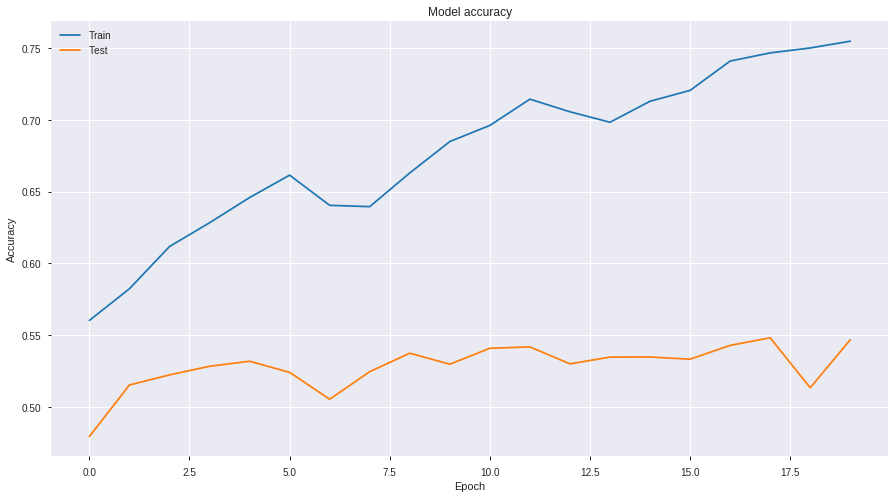

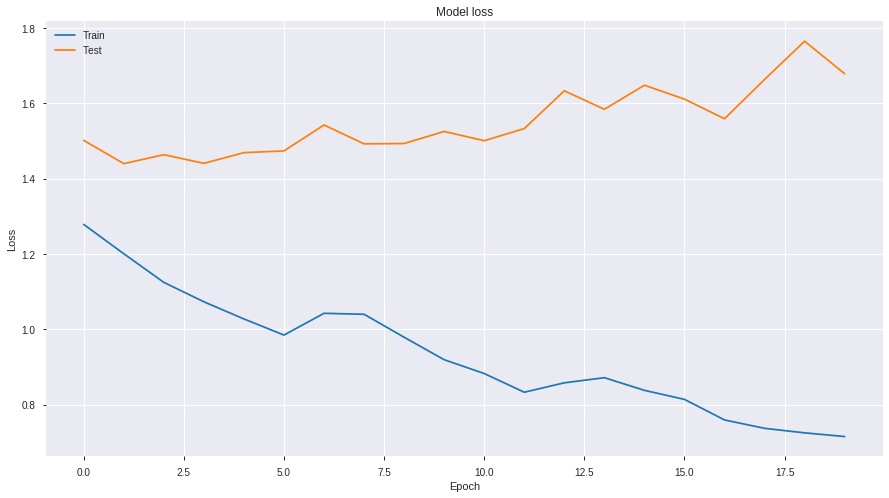

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize=(15, 8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(15, 8))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()